In [1]:
import pandas as pd
import numpy as np
from json import loads
import pandas as pd
import psycopg2 
import csv
#from urllib import parse, request
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import holoviews as hv
hv.extension('matplotlib', width="100")
%opts Curve [width=1200 height=500 tools=['hover'] ] {+framewise} VLine (color="black")
%opts Bars  [width=800 height=400 tools=['hover'] group_index=1 legend_position='top_left' xrotation=90]

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Unexpected plot option 'height' for Curve in loaded backend 'matplotlib'.

Possible keywords in the currently active 'matplotlib' renderer are: ['apply_extents', 'apply_ranges', 'apply_ticks', 'aspect', 'autotick', 'bgcolor', 'fig_alpha', 'fig_bounds', 'fig_inches', 'fig_latex', 'fig_rcparams', 'fig_size', 'final_hooks', 'finalize_hooks', 'fontsize', 'initial_hooks', 'interpolation', 'invert_axes', 'invert_xaxis', 'invert_yaxis', 'invert_zaxis', 'labelled', 'logx', 'logy', 'logz', 'normalize', 'projection', 'relative_labels', 'show_frame', 'show_grid', 'show_legend', 'show_title', 'sublabel_format', 'sublabel_position', 'sublabel_size', 'title_format', 'xaxis', 'xrotation', 'xticks', 'yaxis', 'yrotation', 'yticks', 'zaxis', 'zrotation', 'zticks']

If you believe this keyword is correct, please make sure the backend has been imported or loaded with the hv.extension.Unexpected plot option 'height' for Bars in loaded backend 'matplotlib'.

Possible keywords in the currently active 'matplo

In [2]:
#Extract the features from DB
conn = psycopg2.connect("dbname='SQLBook' user='postgres' host='localhost' password='postgres' password='postgres'")
cur = conn.cursor()

In [3]:
cur.execute("""select o.customerid,p.asin from customers c,
orders o, orderlines ol,products p
where c.customerid = o.customerid
and o.orderid =ol.orderid
and ol.productid =p.productid
and c.customerid in (select o1.customerid from orders o1,orderlines ol1 
where o1.orderid =ol1.orderid
group by o1.customerid
having count(distinct(ol1.productid))=1)
group by o.customerid,p.asin""")
rows = cur.fetchall()

df = pd.DataFrame(rows,columns=['customerid','asin'])

In [4]:
matrix_co = np.load('rating_indexed.npy')

In [5]:
matrix_co

array([4.266669021780665, 3.1755353655911867, 6.594471256185155, ...,
       1.1146706265121789, 4.330101666225632, 5.047033642158072], dtype=object)

In [6]:
def get_idx_from_asin(asin_list):
    list_idx = []
    for asin in asin_list:
        #print (asin)
        try:
            list_idx.append(list_asin_names.index(asin))
        except ValueError:
            pass
    return list_idx

In [7]:
list_asin_names=list(np.load('asin.npy'))

In [8]:
list_asin_names=[i.decode() for i in list_asin_names]

In [9]:
df['asin_index']=-1

In [10]:
def get_asin_index(x):
    l=[]
    l.append(x['asin'])
    x['asin_index']=get_idx_from_asin(l)[0]
    return x

In [11]:
df=df.apply(lambda x: get_asin_index(x),axis=1)

In [12]:
arg_num_rec=10

In [13]:
indices = np.nonzero(matrix_co)[0]
toprec = indices[np.argsort(matrix_co[indices])][-1 * arg_num_rec:][::-1]

In [14]:
toprec

array([2025, 2864, 1874, 2845, 3220, 2782,  747, 1019, 2655, 1980])

In [15]:
1524,930,3703,1019,2290,2056,275,2347,2984,361

(1524, 930, 3703, 1019, 2290, 2056, 275, 2347, 2984, 361)

In [16]:
df

,customerid,asin,asin_index
0,1,0004990218,3532
1,2,0003708861,1071
2,3,0006810195,681
3,4,0003801055,79
4,5,000611718X,1524
5,6,0000202010,1927
6,9,000611718X,1524
7,11,0007103867,3703
8,12,000611718X,1524
9,13,0005152062,2290


In [17]:
df_indexed=df.groupby('asin_index').count().sort_values(by='asin',ascending=False)

In [18]:
for i in toprec:
    print (df_indexed[df_indexed.index==i])

            customerid  asin
asin_index                  
2025              1203  1203
            customerid  asin
asin_index                  
2864               335   335
            customerid  asin
asin_index                  
1874                62    62
            customerid  asin
asin_index                  
2845                 6     6
            customerid  asin
asin_index                  
3220                25    25
            customerid  asin
asin_index                  
2782                 2     2
            customerid  asin
asin_index                  
747                123   123
            customerid  asin
asin_index                  
1019              3833  3833
            customerid  asin
asin_index                  
2655               198   198
            customerid  asin
asin_index                  
1980              1137  1137


#### Validation Process 1

- Randomly pick 10 from Top N Books where N - 50 to 500 in steps of 50
- See what % of customers endeded up buying from the recommendations

In [19]:
def create_seed(rand):
    np.random.seed(rand) # create seed for repeatable results

In [20]:
create_seed(0)
indices = np.nonzero(matrix_co)[0]

In [22]:
print ('Total sales for customers with 1  book: '+str(len(df)))

Total sales for customers with 1  book: 138355


In [73]:
cnt=0
for i in range(len(df)):
    if df.iloc[i]['asin_index'] in pick_10:
        cnt=cnt+1

print ('Model accuracy: '+ str(cnt/len(df)))

Model accuracy: 0.03049401900907087


In [ ]:
x=[10,20,30,40,50,100,150,200,250,300]
y=[0.012699215785479383,0.13659788225940514,0.2285352896534278,0.2842181345090528,0.34234397022153157,0.448137038777059,0.5517979111705396,0.6225651403996965,0.666408875718261,0.7060821798995338]


In [ ]:
Model accuracy with top 10 and pick 138354: 0.012699215785479383
Model accuracy with top 20 and pick 138354: 0.13659788225940514
Model accuracy with top 30 and pick 138354: 0.2285352896534278
Model accuracy with top 40 and pick 138354: 0.2842181345090528
Model accuracy with top 50 and pick 138354: 0.34234397022153157
Model accuracy with top 100 and pick 138354: 0.448137038777059
Model accuracy with top 150 and pick 138354: 0.5517979111705396
Model accuracy with top 200 and pick 138354: 0.6225651403996965
Model accuracy with top 250 and pick 138354: 0.666408875718261
Model accuracy with top 300 and pick 138354: 0.7060821798995338

In [112]:
arg_num_rec=[10,20,30,40,50,100,150,200,250,300]
pick = [5,6,7,8,9,10,11,12,13,14,15]
x=[]
y=[]
for k in pick:
    y=[]
    for i in arg_num_rec:
        #x.append(i)
        toprec = indices[np.argsort(matrix_co[indices])][-1 * i:][::-1]
        ind_random = np.random.permutation(toprec)
        pick_10 = ind_random[:k]
        cnt=0
        for j in range(len(df)):
            if df.iloc[j]['asin_index'] in pick_10:
                cnt=cnt+1
        y.append(cnt/len(df))
        print ('Model accuracy with top '+ str(i) + ' and pick '+str(k)+': '+ str(cnt/len(df)))
    x.append(y)

Model accuracy with top 10 and pick 5: 0.003953597629286979
Model accuracy with top 20 and pick 5: 0.038256658595641646
Model accuracy with top 30 and pick 5: 0.02792815583101442
Model accuracy with top 40 and pick 5: 0.013031693831086696
Model accuracy with top 50 and pick 5: 0.006953127823352969
Model accuracy with top 100 and pick 5: 0.011369303603050124
Model accuracy with top 150 and pick 5: 0.004582414802500813
Model accuracy with top 200 and pick 5: 0.022702468288099454
Model accuracy with top 250 and pick 5: 0.009714141158613711
Model accuracy with top 300 and pick 5: 0.005579848939322757
Model accuracy with top 10 and pick 6: 0.03069639694987532
Model accuracy with top 20 and pick 6: 0.01812005348559864
Model accuracy with top 30 and pick 6: 0.03512702829677279
Model accuracy with top 40 and pick 6: 0.05407827689638972
Model accuracy with top 50 and pick 6: 0.023461385566116152
Model accuracy with top 100 and pick 6: 0.0352499006179755
Model accuracy with top 150 and pick 6: 0

In [26]:
arg_num_rec=[10,20,30,40,50,100,150,200,250,300]
pick = [5,6,7,8,9,10,11,12,13,14,15]
x=[]
y=[]
for k in pick:
    y=[]
    for i in arg_num_rec:
        #x.append(i)
        toprec = indices[np.argsort(matrix_co[indices])][-1 * i:][::-1]
        ind_random = np.random.permutation(toprec)
        pick_10 = ind_random[:k]
        cnt=0
        for j in range(len(df)):
            if df.iloc[j]['asin_index'] in pick_10:
                cnt=cnt+1
        y.append(cnt/len(df))
        #print ('Model accuracy with top '+ str(i) + ' and pick '+str(k)+': '+ str(cnt/len(df)))
    x.append(y)

In [30]:
plt.figure(figsize=(12,12))

[]

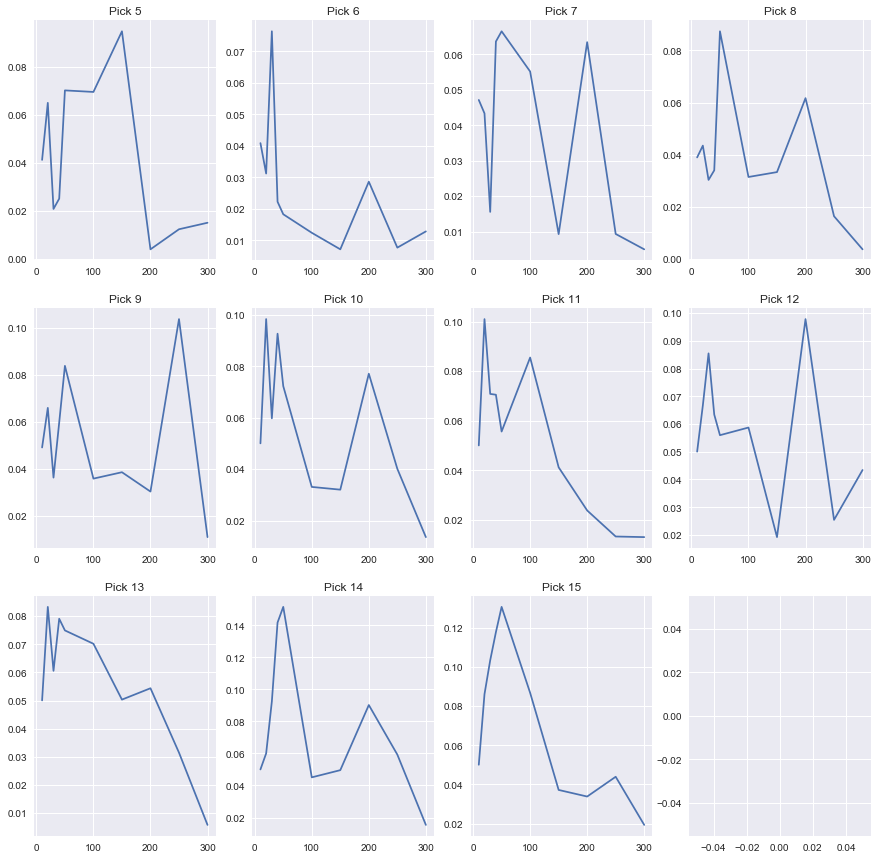

In [37]:
f, axarr = plt.subplots(3, 4,figsize=(15,15))
k=0
n=0
for i in range(3):
    for j in range(4):
        try:
            axarr[i, j].plot(arg_num_rec,x[k])
            axarr[i, j].set_title('Pick '+str(pick[n]))
            k=k+1
            n=n+1
            plt.sca(axes[i, j])
            plt.xticks(range(len(arg_num_rec)), arg_num_rec)
        except:
            pass
        
#axarr[0, 0].plot(x, y)
#axarr[0, 0].set_title('Axis [0,0]')
#axarr[0, 1].scatter(x, y)
#axarr[0, 1].set_title('Axis [0,1]')
#axarr[1, 0].plot(x, y ** 2)
#axarr[1, 0].set_title('Axis [1,0]')
#axarr[1, 1].scatter(x, y ** 2)
#axarr[1, 1].set_title('Axis [1,1]')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
#plt.setp([a.get_xticklabels() for a in x[0, :]], visible=False)
#plt.setp([a.get_yticklabels() for a in y[:, 1]], visible=False)
plt.plot()